## DengAI competition
The goal of this competition is to build a model that predicts the number of Dengue cases in San Juan and Iquitos

We start by exploring the data.
- [X] Load data
- [X] Basic EDA
- [X] Features correlation

### Import libraries

In [2]:
import pandas as pd
import os
import seaborn as sns
from dateutil import parser
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

### Load data

In [3]:
data_folder = 'data'
features_train_path = 'dengue_features_train.csv'
labels_train_path = 'dengue_labels_train.csv'
features_test_path = 'dengue_features_test.csv'

In [4]:
features_train = pd.read_csv(os.path.join(data_folder, features_train_path))
labels_train = pd.read_csv(os.path.join(data_folder, labels_train_path))
features_test = pd.read_csv(os.path.join(data_folder, features_test_path))

In [5]:
features_train[['city', 'year']].drop_duplicates()

,city,year
0,sj,1990
35,sj,1991
87,sj,1992
139,sj,1993
191,sj,1994
243,sj,1995
295,sj,1996
347,sj,1997
399,sj,1998
451,sj,1999


In [6]:
features_test[['city', 'year']].drop_duplicates()

,city,year
0,sj,2008
35,sj,2009
87,sj,2010
139,sj,2011
191,sj,2012
243,sj,2013
260,iq,2010
286,iq,2011
338,iq,2012
390,iq,2013


### Basic Pre-processing

In [7]:
# transform week_start_date into a datetime feature
features_train['week_start_date'] = features_train.progress_apply(lambda x: parser.parse(x.week_start_date), axis=1)

  0%|          | 0/1456 [00:00<?, ?it/s]

In [8]:
# Merge features and labels for easier exploration
train_df = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

### Print dataframes

In [9]:
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [10]:
features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### Columns

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

## Plots

<AxesSubplot:>

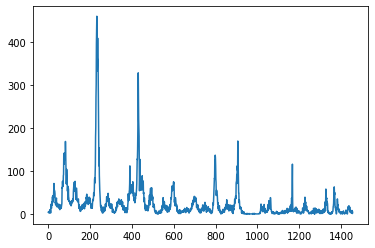

In [12]:
# Raw total_cases
train_df.total_cases.plot()

<AxesSubplot:xlabel='week_start_date', ylabel='total_cases'>

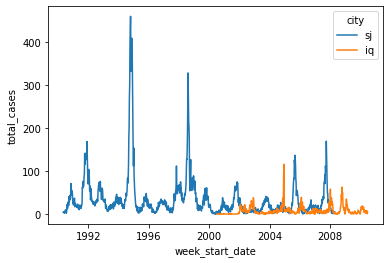

In [13]:
# Total cases per week by city
sns.lineplot(x='week_start_date', y='total_cases', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

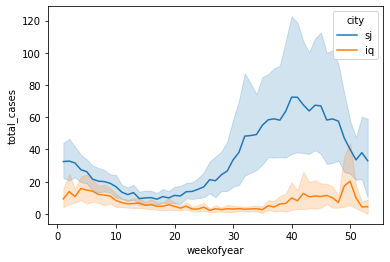

In [14]:
#Total cases per week of year by city
sns.lineplot(x='weekofyear', y='total_cases', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='station_avg_temp_c'>

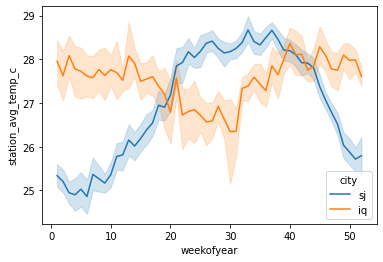

In [15]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='station_avg_temp_c', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_avg_temp_k'>

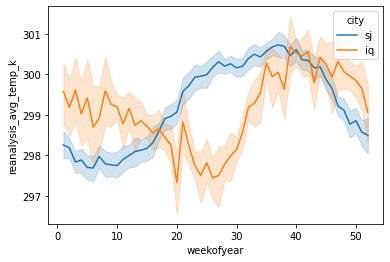

In [16]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_avg_temp_k', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_max_air_temp_k'>

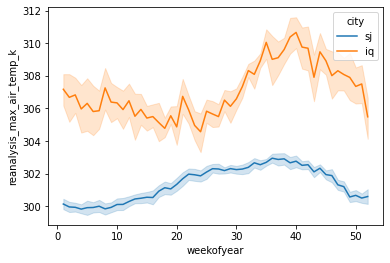

In [17]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_max_air_temp_k', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_min_air_temp_k'>

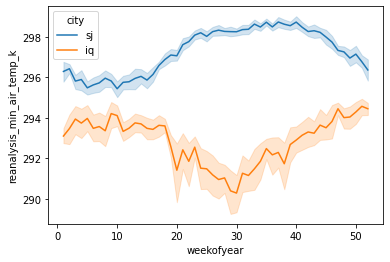

In [18]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_min_air_temp_k', hue='city', data= train_df)

From this two plots we can obtain some initial conclusions.

Theres a bit of a delay between the peak of temperature and the peak of cases.

Mosquitos prefer warmer places, which can infer that in a warmer season, mosquitos reproduce faster. After a couple of week of population increase we can start seeing an increase in the number of cases.

<AxesSubplot:xlabel='weekofyear', ylabel='station_precip_mm'>

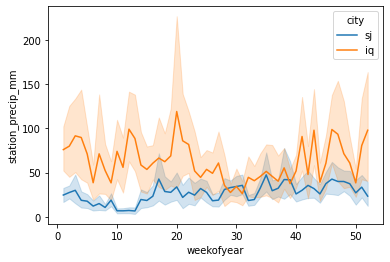

In [19]:
# Precipitation per week of year by city
sns.lineplot(x='weekofyear', y='station_precip_mm', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_precip_amt_kg_per_m2'>

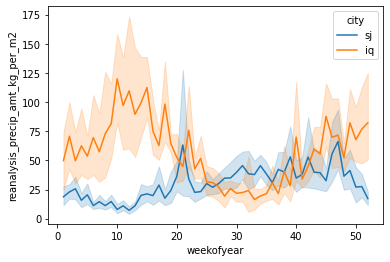

In [20]:
# Precipitation per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_precip_amt_kg_per_m2', hue='city', data= train_df)

The Dengue mosquito also grows in recipients with water, so rainiy seasons might have a relationship with the number of cases, but from this initial plot, there's no obvious conclusion

In [21]:
# sns.scatterplot(x='reanalysis_precip_amt_kg_per_m2', y='total_cases', hue='city', data=train_df)

### Other plots

ndvi_ne


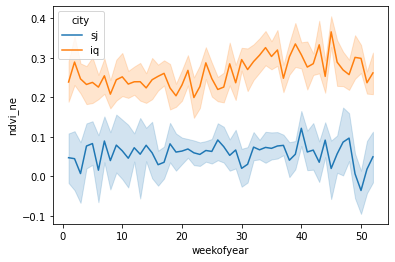

ndvi_nw


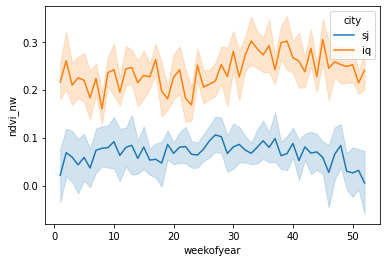

ndvi_se


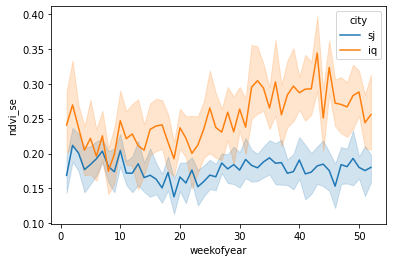

ndvi_sw


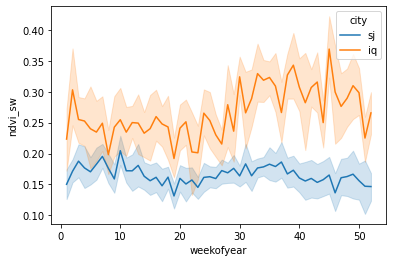

precipitation_amt_mm


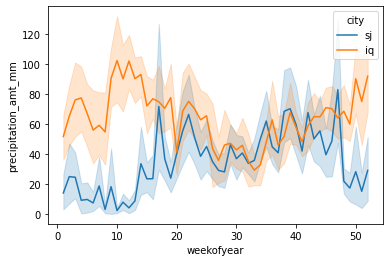

reanalysis_air_temp_k


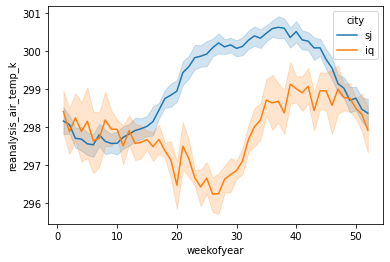

reanalysis_avg_temp_k


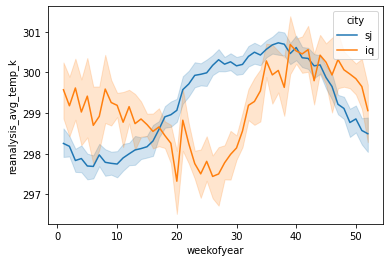

reanalysis_dew_point_temp_k


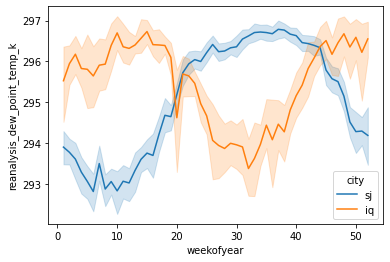

reanalysis_max_air_temp_k


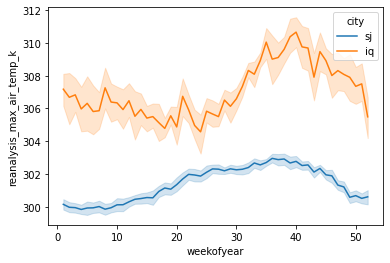

reanalysis_min_air_temp_k


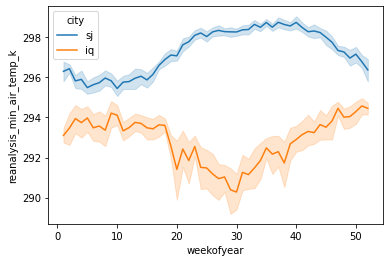

reanalysis_precip_amt_kg_per_m2


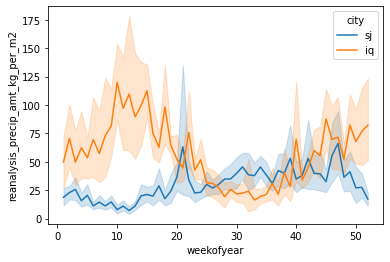

reanalysis_relative_humidity_percent


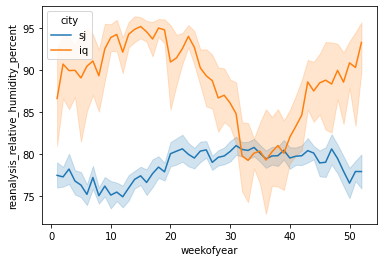

reanalysis_sat_precip_amt_mm


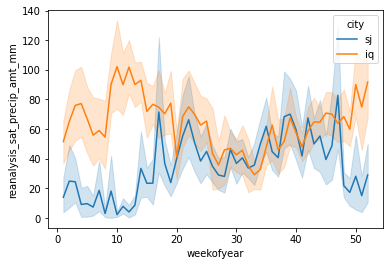

reanalysis_specific_humidity_g_per_kg


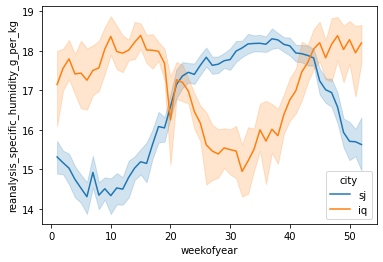

reanalysis_tdtr_k


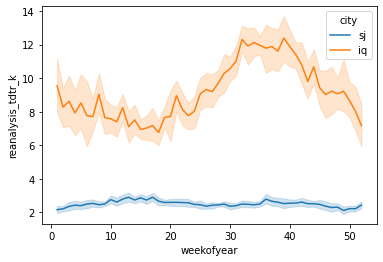

station_avg_temp_c


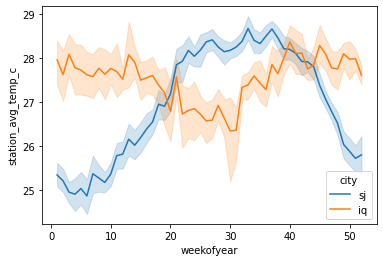

station_diur_temp_rng_c


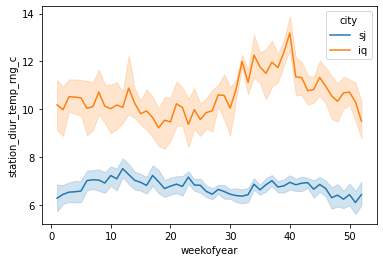

station_max_temp_c


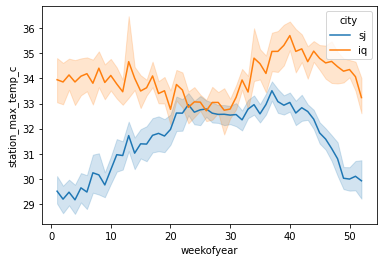

station_min_temp_c


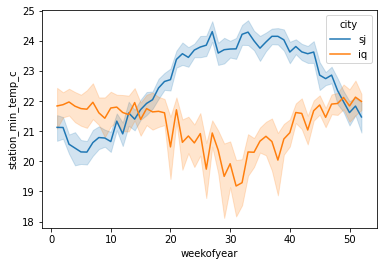

station_precip_mm


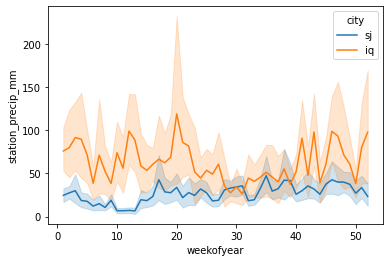

total_cases


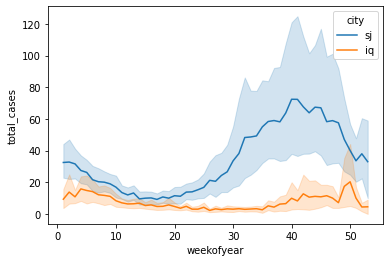

In [22]:
for column in train_df.columns:
    if column not in ['city', 'weekofyear', 'year', 'week_start_date']:
        print(column)
        sns.lineplot(x='weekofyear', y=column, hue='city', data= train_df)
        plt.show()

weekofyear


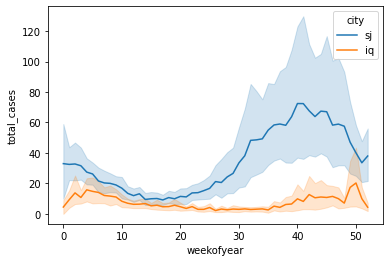

ndvi_ne


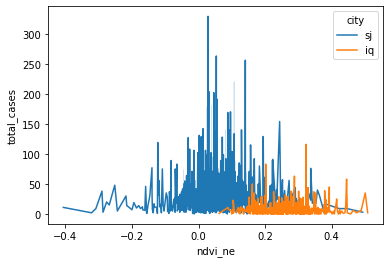

ndvi_nw


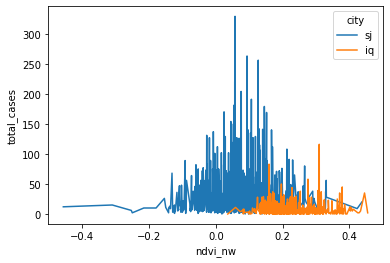

ndvi_se


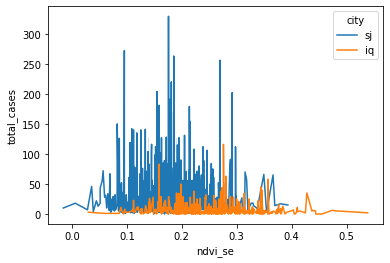

ndvi_sw


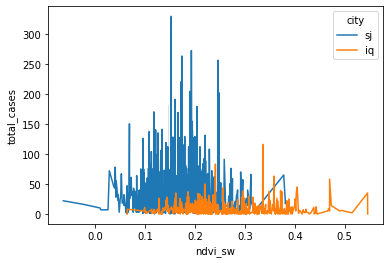

precipitation_amt_mm


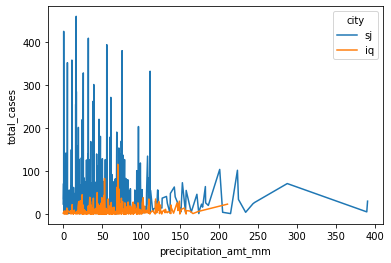

reanalysis_air_temp_k


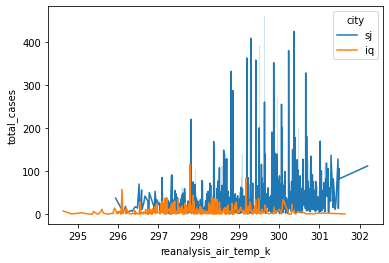

reanalysis_avg_temp_k


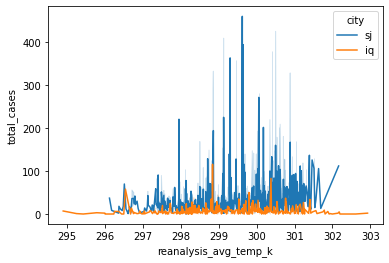

reanalysis_dew_point_temp_k


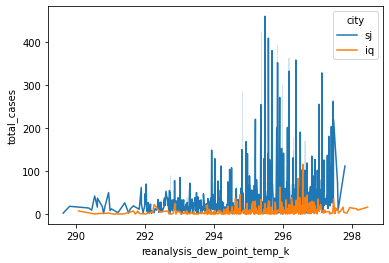

reanalysis_max_air_temp_k


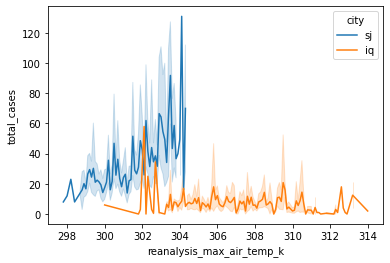

reanalysis_min_air_temp_k


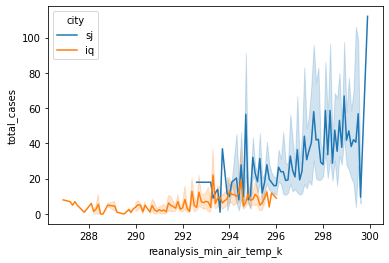

reanalysis_precip_amt_kg_per_m2


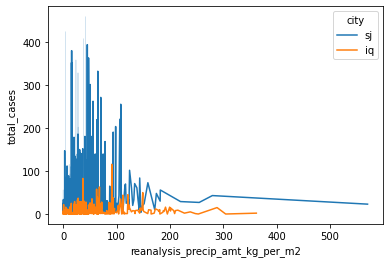

reanalysis_relative_humidity_percent


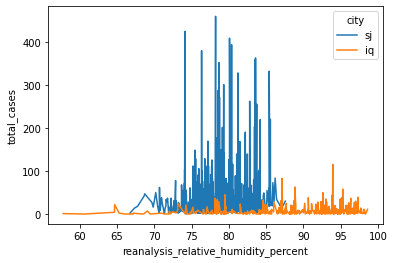

reanalysis_sat_precip_amt_mm


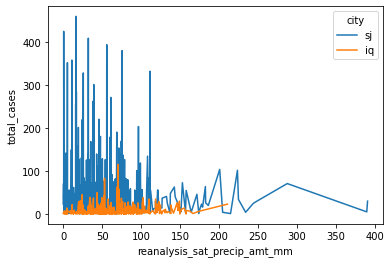

reanalysis_specific_humidity_g_per_kg


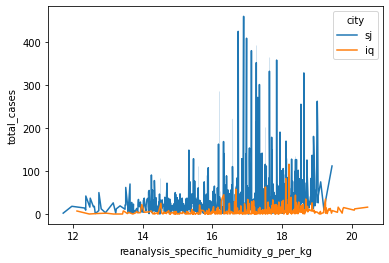

reanalysis_tdtr_k


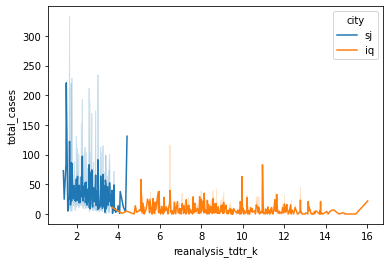

station_avg_temp_c


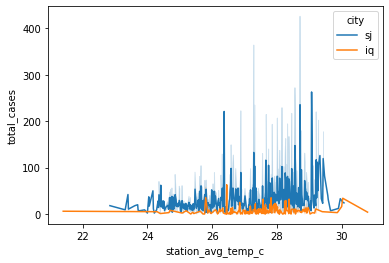

station_diur_temp_rng_c


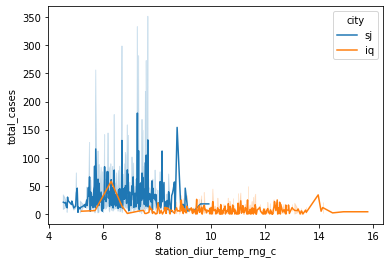

station_max_temp_c


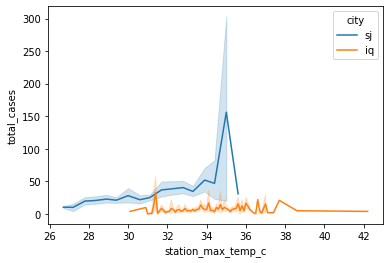

station_min_temp_c


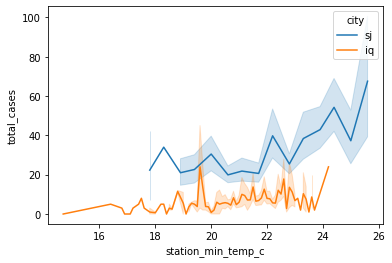

station_precip_mm


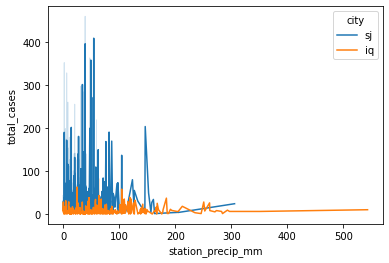

In [81]:
for column in train_df.columns:
    if column not in ['city', 'total_cases', 'year', 'week_start_date']:
        print(column)
        sns.lineplot(x=column, y='total_cases', hue='city', data= train_df)
        plt.show()

### Plot cross-correlation

<AxesSubplot:>

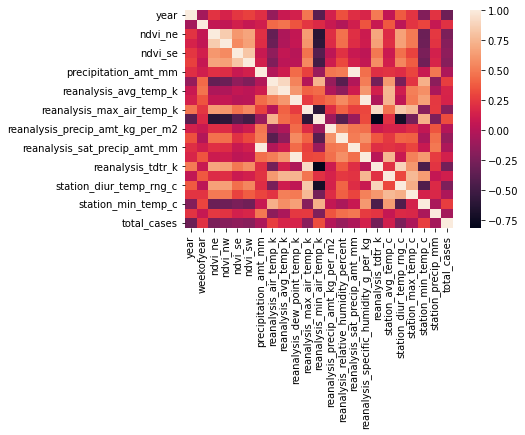

In [82]:
sns.heatmap(train_df.corr())

<AxesSubplot:>

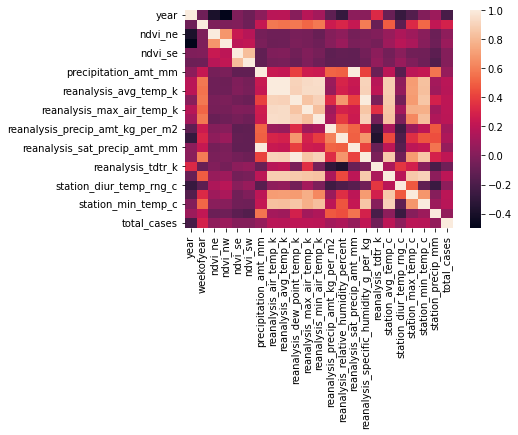

In [83]:
sns.heatmap(train_df[train_df.city=='sj'].corr())

<AxesSubplot:>

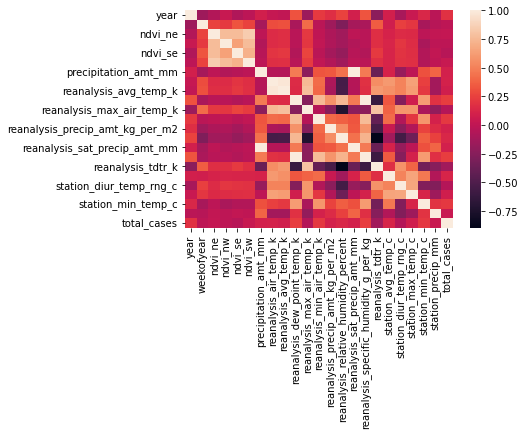

In [84]:
sns.heatmap(train_df[train_df.city=='iq'].corr())

### Initial exploration conclusions
* There is missing data that needs to be fixed
* There are outliers that need to be removed / fixed
* There seem to be a delayed relationship between temperature and total_cases
* Variables of similar kind look highly correlated

### Other explorations
- [ ] Check week of year

In [42]:
train_df['weekofyear_calc'] = train_df.progress_apply(lambda x: x.week_start_date.weekofyear, axis=1)

  0%|          | 0/1456 [00:00<?, ?it/s]

In [44]:
train_df[train_df.weekofyear != train_df.weekofyear_calc]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,weekofyear_calc


In [51]:
train_df[(train_df.city == 'sj') & (train_df.year == 2005)].iloc[0].week_start_date.isocalendar()

(2004, 53, 6)

In [52]:
def week_from_date(date_object):
    date_ordinal = date_object.toordinal()
    year = date_object.year
    week = ((date_ordinal - _week1_start_ordinal(year)) // 7) + 1
    if week >= 52:
        if date_ordinal >= _week1_start_ordinal(year + 1):
            year += 1
            week = 1
    return year, week

def _week1_start_ordinal(year):
    jan1 = date(year, 1, 1)
    jan1_ordinal = jan1.toordinal()
    jan1_weekday = jan1.weekday()
    week1_start_ordinal = jan1_ordinal - ((jan1_weekday + 1) % 7)
    return week1_start_ordinal

In [54]:
from datetime import date
week_from_date(train_df[(train_df.city == 'sj') & (train_df.year == 2005)].iloc[0].week_start_date)

(2005, 1)

In [57]:
train_df[train_df.weekofyear == 53]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,weekofyear_calc
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,53
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,53
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,53
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,53
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,53
